In [1]:
import python_src.thingspeak as thingspeak
import json
import numpy as np
import pandas as pd
import metpy.calc as mpcalc
from metpy.units import units

import datetime

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean

from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

In [3]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [4]:
sbell = thingspeak.TSAccount('https://api.thingspeak.com/','869L0PHK8GKAIIYQ')

In [5]:
sbell.list_my_channels()

[{'id': 843357,
  'name': 'ShopEnv',
  'description': 'Testing out a temperature sensor\r\nBMP (Press and Temp) sensor in shop... has been moved and played with.  Stationary since ?',
  'latitude': '0.0',
  'longitude': '0.0',
  'created_at': '2019-08-08T21:45:02Z',
  'elevation': '',
  'last_entry_id': 133926,
  'public_flag': True,
  'url': '',
  'ranking': 50,
  'metadata': '',
  'license_id': 0,
  'github_url': 'NaN',
  'tags': [],
  'api_keys': [{'api_key': 'CZY04CZ4QODM0WEJ', 'write_flag': True},
   {'api_key': 'A71HJNG9AHAN0AMI', 'write_flag': False}]},
 {'id': 1027974,
  'name': 'Troom',
  'description': 'Temperature using TMP36 (transitor)',
  'latitude': '0.0',
  'longitude': '0.0',
  'created_at': '2020-03-29T17:41:23Z',
  'elevation': '',
  'last_entry_id': 134180,
  'public_flag': True,
  'url': '',
  'ranking': 50,
  'metadata': '',
  'license_id': 0,
  'github_url': 'NaN',
  'tags': [],
  'api_keys': [{'api_key': 'L459K7EKJPLJGFRT', 'write_flag': True},
   {'api_key': 'W

In [6]:
sbellc = thingspeak.TSChannel(acc_host_addr='https://api.thingspeak.com/',api_key='QS3DYISJPLE5EQCW'
,ch_id=1037066)

dt11 = sbellc.get_a_channel_field_feed(['field1','field2'],parameters={'days':14})

dt11_df = pd.DataFrame(dt11['feeds'])
dt11_df = dt11_df.set_index(pd.DatetimeIndex(dt11_df['created_at']))
dt11_df['field1'] = dt11_df['field1'].astype('float64')
dt11_df['field2'] = dt11_df['field2'].astype('float64')

dt11_df.rename(columns = {'field1':'temperature','field2':'humidity'},inplace = True)

In [7]:
sbellc = thingspeak.TSChannel(acc_host_addr='https://api.thingspeak.com/',api_key='QS3DYISJPLE5EQCW'
,ch_id=843357)

bmp = sbellc.get_a_channel_field_feed(['field3','field4'],parameters={'days':6})

bmp_df = pd.DataFrame(bmp['feeds'])
bmp_df = bmp_df.set_index(pd.DatetimeIndex(bmp_df['created_at']))
bmp_df['field3'] = bmp_df['field3'].astype('float64')
bmp_df['field4'] = bmp_df['field4'].astype('float64')

bmp_df.rename(columns = {'field3':'temperature','field4':'pressure'},inplace = True)

In [8]:
sbellc = thingspeak.TSChannel(acc_host_addr='https://api.thingspeak.com/',api_key='QS3DYISJPLE5EQCW'
,ch_id=1027974)

tmp36 = sbellc.get_a_channel_field_feed('field1',parameters={'days':14})

tmp36_df = pd.DataFrame(tmp36['feeds'])
tmp36_df = tmp36_df.set_index(pd.DatetimeIndex(tmp36_df['created_at']))
tmp36_df['field1'] = tmp36_df['field1'].astype('float64')

tmp36_df.rename(columns = {'field1':'temperature'},inplace = True)

In [9]:
sbellc = thingspeak.TSChannel(acc_host_addr='https://api.thingspeak.com/',api_key='QS3DYISJPLE5EQCW'
,ch_id=1047747)

test = sbellc.get_a_channel_field_feed(['field1','field2','field3'],parameters={'days':14})
#tmp102 = sbellc.get_a_channel_field_feed('field3',parameters={'days':10})

test_df = pd.DataFrame(test['feeds'])
test_df = test_df.set_index(pd.DatetimeIndex(test_df['created_at']))
test_df['field1'] = test_df['field1'].astype('float64')
test_df['field2'] = test_df['field2'].astype('float64')
test_df['field3'] = test_df['field3'].astype('float64')

test_df.rename(columns = {'field1':'temperature','field2':'temperature_2','field3':'humidity'},inplace = True)

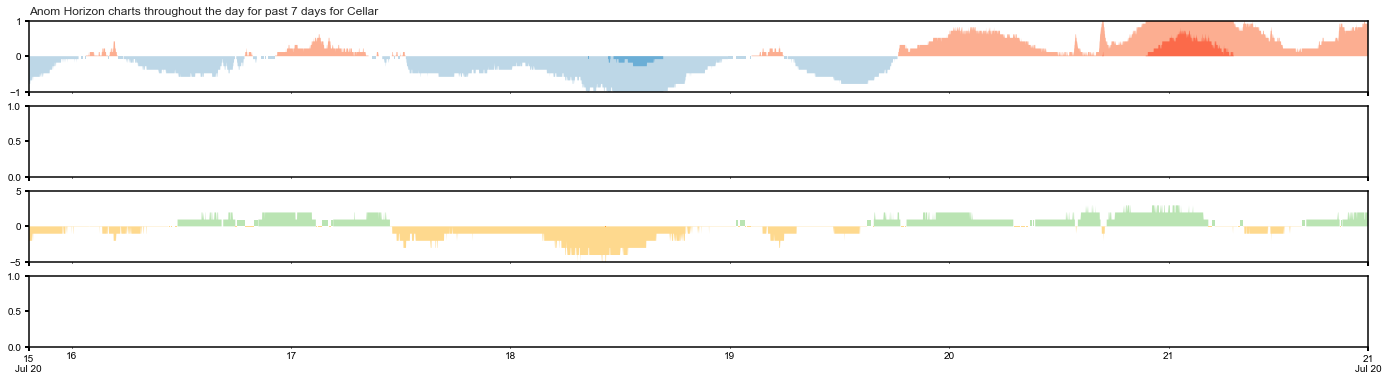

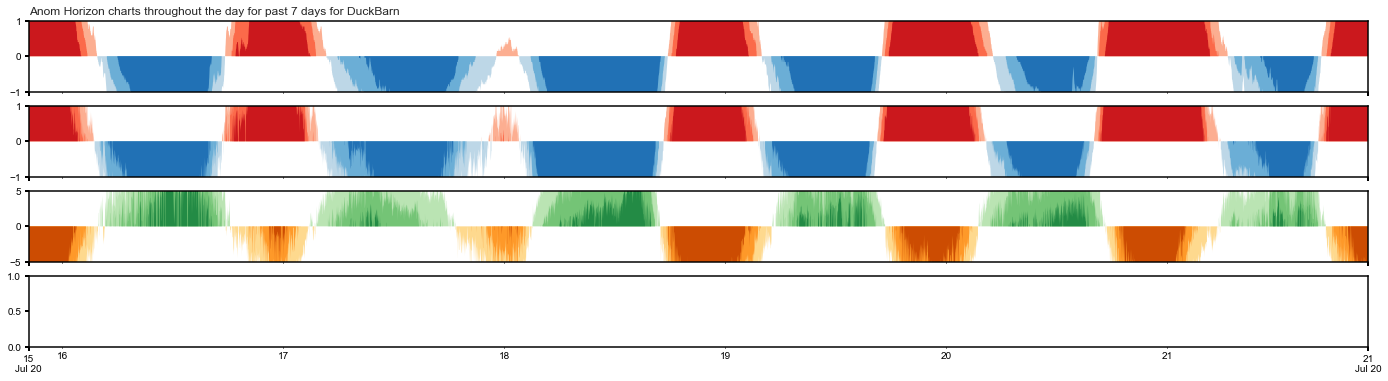

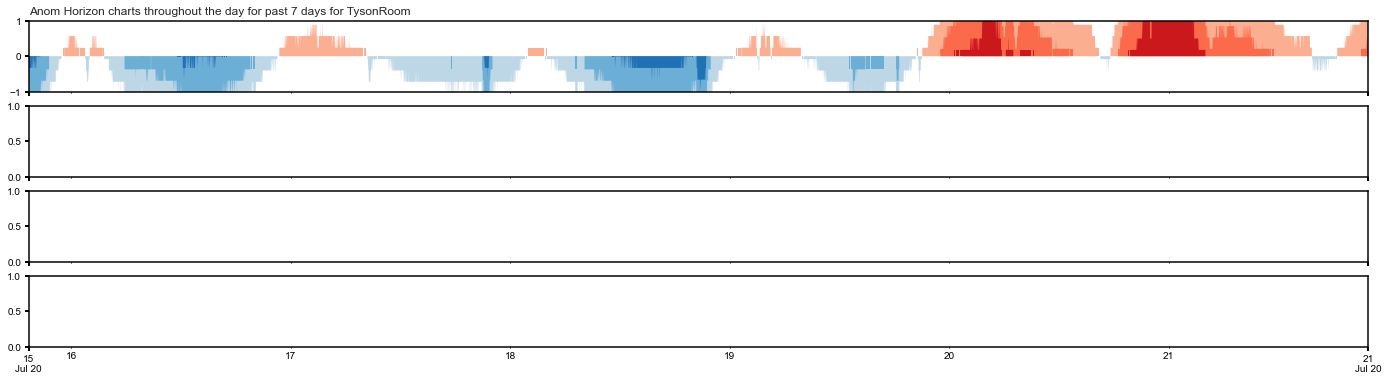

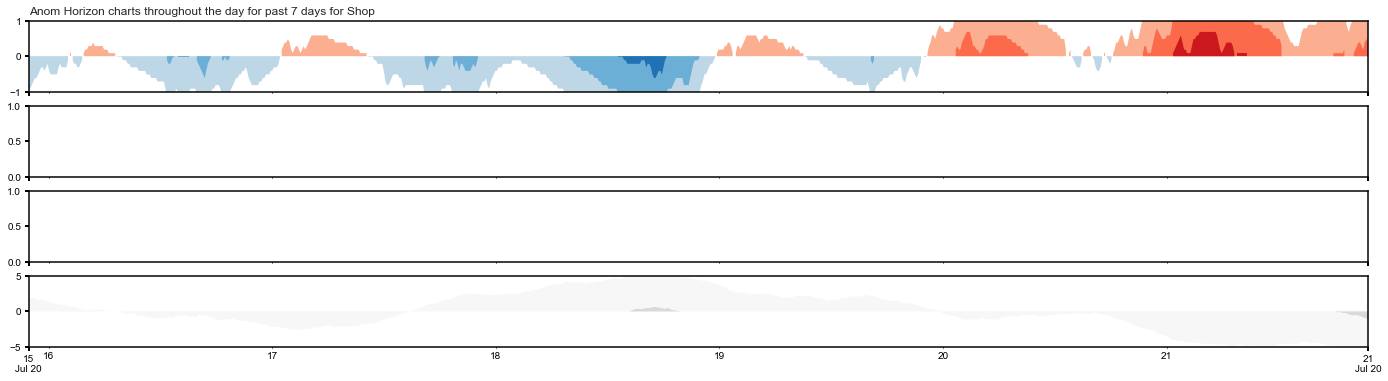

In [10]:
# Horizon Plots
dayperiod = [7,]

data_list = {'Cellar':dt11_df,
             'DuckBarn':test_df,
             'TysonRoom':tmp36_df,
             'Shop':bmp_df}

for i, df in (data_list.items()):
    for numdays in dayperiod:

        dfsub = df[str((datetime.datetime.utcnow()-datetime.timedelta(days=numdays)).date()):str(datetime.datetime.utcnow().date())]
        

        fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,sharex='col',figsize=(24,6))
        ax1.set_title(f'Anom Horizon charts throughout the day for past {numdays} days for {i}',loc='left')

        try:
            anom = dfsub['temperature']-dfsub['temperature'].mean()
            ax1.fill_between(dfsub.index.values,anom,where=anom>0,facecolor='#fcae91')
            ax1.fill_between(dfsub.index.values,anom-1,where=anom>1,facecolor='#fb6a4a')
            ax1.fill_between(dfsub.index.values,anom-2,where=anom>2,facecolor='#cb181d')
            ax1.fill_between(dfsub.index.values,anom,where=anom<0,facecolor='#bdd7e7')
            ax1.fill_between(dfsub.index.values,anom+1,where=anom<-1,facecolor='#6baed6')
            ax1.fill_between(dfsub.index.values,anom+2,where=anom<-2,facecolor='#2171b5')
            ax1.set_ylim([-1,1])
        except:
            pass
        try:
            anom = dfsub['temperature_2']-dfsub['temperature_2'].mean()
            ax2.fill_between(dfsub.index.values,anom,where=anom>0,facecolor='#fcae91')
            ax2.fill_between(dfsub.index.values,anom-1,where=anom>1,facecolor='#fb6a4a')
            ax2.fill_between(dfsub.index.values,anom-2,where=anom>2,facecolor='#cb181d')
            ax2.fill_between(dfsub.index.values,anom,where=anom<0,facecolor='#bdd7e7')
            ax2.fill_between(dfsub.index.values,anom+1,where=anom<-1,facecolor='#6baed6')
            ax2.fill_between(dfsub.index.values,anom+2,where=anom<-2,facecolor='#2171b5')
            ax2.set_ylim([-1,1])
        except:
            pass        
        try:
            anom = dfsub['humidity']-dfsub['humidity'].mean()
            ax3.fill_between(dfsub.index.values,anom,where=anom>0,facecolor='#bae4b3')
            ax3.fill_between(dfsub.index.values,anom-5,where=anom>5,facecolor='#74c476')
            ax3.fill_between(dfsub.index.values,anom-10,where=anom>10,facecolor='#238b45')
            ax3.fill_between(dfsub.index.values,anom,where=anom<0,facecolor='#fed98e')
            ax3.fill_between(dfsub.index.values,anom+5,where=anom<-5,facecolor='#fe9929')
            ax3.fill_between(dfsub.index.values,anom+10,where=anom<-10,facecolor='#cc4c02')
            ax3.set_ylim([-5,5])
        except:
            pass
        try:
            anom = dfsub['pressure']-dfsub['pressure'].mean()
            ax4.fill_between(dfsub.index.values,anom,where=anom>0,facecolor='#f7f7f7')
            ax4.fill_between(dfsub.index.values,anom-5,where=anom>5,facecolor='#d9d9d9')
            ax4.fill_between(dfsub.index.values,anom-10,where=anom>10,facecolor='#bdbdbd')
            ax4.fill_between(dfsub.index.values,anom,where=anom<0,facecolor='#f7f7f7')
            ax4.fill_between(dfsub.index.values,anom+5,where=anom<-5,facecolor='#d9d9d9')
            ax4.fill_between(dfsub.index.values,anom+10,where=anom<-10,facecolor='#bdbdbd')
            ax4.set_ylim([-5,5])
        except:
            pass        
        xfmt = mdates.DateFormatter('%d-%b')
        ax1.xaxis.set_major_formatter(xfmt)
        ax2.xaxis.set_major_formatter(xfmt)
        ax3.xaxis.set_major_formatter(xfmt)
        ax4.xaxis.set_major_formatter(xfmt)
        ax1.set_xlim(dfsub.index.min(),dfsub.index.max())
        ax2.set_xlim(dfsub.index.min(),dfsub.index.max())
        ax3.set_xlim(dfsub.index.min(),dfsub.index.max())
        ax4.set_xlim(dfsub.index.min(),dfsub.index.max())

        ax1.xaxis.set_major_locator(DayLocator(bymonthday=[1,15]))
        if numdays <=90:
            ax1.xaxis.set_minor_locator(DayLocator(range(0,32,1)))
        ax1.xaxis.set_minor_formatter(DateFormatter('%d'))
        ax1.xaxis.set_major_formatter(DateFormatter('%d\n%b %y'))
        ax1.xaxis.set_tick_params(which='major', pad=3)
        ax1.xaxis.set_tick_params(which='minor', pad=5)    



In [11]:
import altair as alt
### own colormap
import palettable

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [12]:
#need to merge datasets and rename columns - or squash with column variable name as attribute
# do it with subsampled data to 
data_list = {'Cellar':dt11_df,
             'DuckBarn':test_df,
             'TysonRoom':tmp36_df,
             'Shop':bmp_df}

dfsub = pd.concat([test_df.rename(columns={'temperature': 'DuckBarnTemp_Internal', 'temperature_2': 'DuckBarnTemp_External', 'humidity': 'DuckBarnHumidity_External'}),
                   tmp36_df.rename(columns={'temperature': 'TysonsRoomTemp'}),
                   bmp_df.rename(columns={'temperature': 'ShopTemp'}),                   
                   dt11_df.rename(columns={'temperature': 'CellarTemp', 'humidity': 'CellarHumidity'}),                   
                  ]).resample('15T').mean()

dfsub = dfsub[str((datetime.datetime.utcnow()-datetime.timedelta(days=numdays)).date()):str(datetime.datetime.utcnow().date())]

In [13]:
selector = alt.selection_single(
    fields=['key'], 
    empty='all',
    bind='legend'
)

area1 = alt.Chart(dfsub.reset_index()).transform_fold(
    ['DuckBarnTemp_Internal','DuckBarnTemp_External','TysonsRoomTemp','duckTd','ShopTemp','CellarTemp']
).mark_line(clip=True
).encode(
    alt.X('created_at:T'),
    alt.Y('value:Q'),
    alt.Color('key:N'),
    opacity=alt.condition(selector, alt.value(1), alt.value(0))
).add_selection(
    selector
).properties(
    width=750,
    height=150
).interactive()

area1

alt.Chart(...)

In [14]:
f1 = alt.Chart(dfsub.reset_index()).mark_rect().encode(
    alt.X('hoursminutes(created_at):O', title='hour of day - inside duck barn'),
    alt.Y('monthdate(created_at):O', title='date'),
    alt.Color('DuckBarnTemp_Internal:Q', title='temperature (C)', scale=alt.Scale(range=palettable.cmocean.sequential.Thermal_20.hex_colors)),
    tooltip=['hoursminutes(created_at):O','monthdate(created_at):O','DuckBarnTemp_Internal:Q']
).properties(
    width=720
)

f2 = f1.encode(
    alt.X('hoursminutes(created_at):O', title='hour of day - outside duck barn'),
    alt.Color('DuckBarnTemp_External:Q', title='temperature (C)', scale=alt.Scale(range=palettable.cmocean.sequential.Thermal_20.hex_colors)),
    tooltip=['hoursminutes(created_at):O','monthdate(created_at):O','DuckBarnTemp_External:Q']
)


f3 = f1.encode(
    alt.X('hoursminutes(created_at):O', title='hour of day - Cellar'),
    alt.Color('CellarTemp:Q', title='temperature (C)', scale=alt.Scale(range=palettable.cmocean.sequential.Thermal_20.hex_colors)),
    tooltip=['hoursminutes(created_at):O','monthdate(created_at):O','CellarTemp:Q']
)

f4 = f1.encode(
    alt.X('hoursminutes(created_at):O', title='hour of day - Shop'),
    alt.Color('ShopTemp:Q', title='temperature (C)', scale=alt.Scale(range=palettable.cmocean.sequential.Thermal_20.hex_colors)),
    tooltip=['hoursminutes(created_at):O','monthdate(created_at):O','ShopTemp:Q']
)

f5 = f1.encode(
    alt.X('hoursminutes(created_at):O', title='hour of day - TysonsRoom'),
    alt.Color('TysonsRoomTemp:Q', title='temperature (C)', scale=alt.Scale(range=palettable.cmocean.sequential.Thermal_20.hex_colors)),
    tooltip=['hoursminutes(created_at):O','monthdate(created_at):O','TysonsRoomTemp:Q']
)

(f1 & f2 & f3 & f4 & f5)

alt.VConcatChart(...)

In [15]:
f3 = alt.Chart(dfsub.reset_index()).mark_rect().encode(
    alt.X('hoursminutes(created_at):O', title='hour of day'),
    alt.Y('monthdate(created_at):O', title='date'),
    alt.Color('DuckBarnHumidity_External:Q', title='humidity (%)', scale=alt.Scale(domain=(50,100),range=palettable.cmocean.sequential.Algae_20.hex_colors)),
    tooltip=['hoursminutes(crated_at):O','monthdate(created_at):O','DuckBarnHumidity_External:Q']
).properties(
    width=720
)

f4 = f3.encode(
    alt.Color('CellarHumidity:Q', title='humidity (%)', scale=alt.Scale(domain=(50,100),range=palettable.cmocean.sequential.Algae_20.hex_colors)),
    tooltip=['hoursminutes(crated_at):O','monthdate(created_at):O','CellarHumidity:Q']
)
f3 & f4

alt.VConcatChart(...)